In [4]:
!kaggle competitions download -c titanic


  0%|          | 0.00/34.1k [00:00<?, ?B/s]
100%|##########| 34.1k/34.1k [00:00<00:00, 16.5MB/s]


In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
gender_submission = pd.read_csv('c:/data/titanic/gender_submission.csv')
test = pd.read_csv('c:/data/titanic/test.csv')
train = pd.read_csv('c:/data/titanic/train.csv')

In [7]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [8]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Pclass

In [19]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
train.groupby(['Survived','Pclass'])[['PassengerId']].count()

PassengerId
Survived Pclass             
0        1                80
         2                97
         3               372
1        1               136
         2                87
         3               119

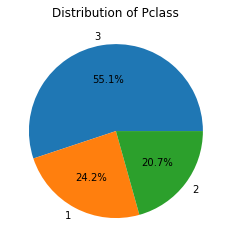

In [3]:
x = train['Pclass'].value_counts().index
y = train['Pclass'].value_counts().values

plt.pie(y,labels=x,autopct='%0.1f%%');
plt.title('Distribution of Pclass');

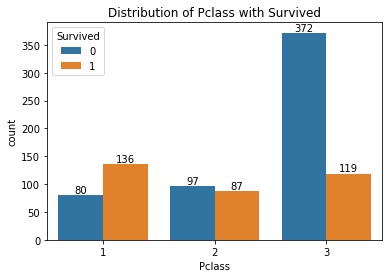

In [56]:
g = sns.countplot(data=train,x='Pclass',hue='Survived');
g.bar_label(g.containers[0]), g.bar_label(g.containers[1]);
plt.title('Distribution of Pclass with Survived');

In [5]:
name = train.Name.apply(lambda x:re.findall('\w{2,}\.',x))

In [6]:
name.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Mr.]          517
[Miss.]        182
[Mrs.]         125
[Master.]       40
[Dr.]            7
[Rev.]           6
[Mlle.]          2
[Major.]         2
[Col.]           2
[Countess.]      1
[Capt.]          1
[Ms.]            1
[Sir.]           1
[Lady.]          1
[Mme.]           1
[Don.]           1
[Jonkheer.]      1
Name: Name, dtype: int64

### Sex

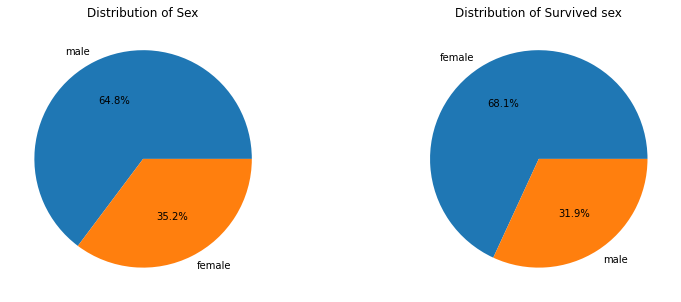

In [85]:
x = train['Sex'].value_counts().index
y = train['Sex'].value_counts().values

plt.figure(figsize=(13,5))
plt.subplot(121)
plt.pie(y,labels=x,autopct='%0.1f%%');
plt.title('Distribution of Sex');

plt.subplot(122)
s_x = train.loc[train.Survived==1,['Sex']].value_counts().reset_index()['Sex']
s_y = train.loc[train.Survived==1,['Sex']].value_counts().values

plt.pie(s_y,labels=s_x,autopct='%0.1f%%');
plt.title('Distribution of Survived sex');

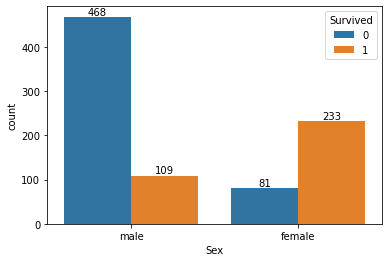

In [50]:
g = sns.countplot(data=train,x='Sex',hue='Survived')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1]);

### Age

In [89]:
train[train.Age.isnull()].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


In [114]:
train.Age.fillna(train.groupby(['SibSp','Parch']).Age.transform('mean'),inplace=True)

In [115]:
train[train.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [21]:
train.Age.fillna(train[train.SibSp>=4].Age.mean(),inplace=True)

In [22]:
test.Age.isnull().sum()

86

In [23]:
test.Age.fillna(train.groupby(['SibSp','Parch']).Age.transform('mean'),inplace=True)

In [24]:
test.Age.isnull().sum()

0

<AxesSubplot:xlabel='Age', ylabel='Count'>

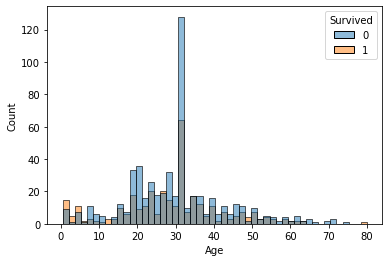

In [122]:
sns.histplot(data=train,x='Age',hue='Survived',bins=50)

### SibSp & Parch

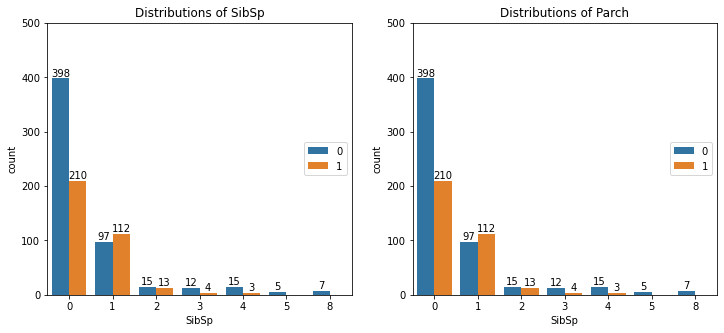

In [130]:
plt.figure(figsize=(12,5))
plt.subplot(121)
g = sns.countplot(data=train,x='SibSp',hue='Survived')
g.set_ylim(0,500),plt.legend(loc='right')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1]);
plt.title('Distributions of SibSp');

plt.subplot(122)
g = sns.countplot(data=train,x='SibSp',hue='Survived')
g.set_ylim(0,500),plt.legend(loc='right')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1]);
plt.title('Distributions of Parch');

### Fare

<AxesSubplot:xlabel='Fare', ylabel='Count'>

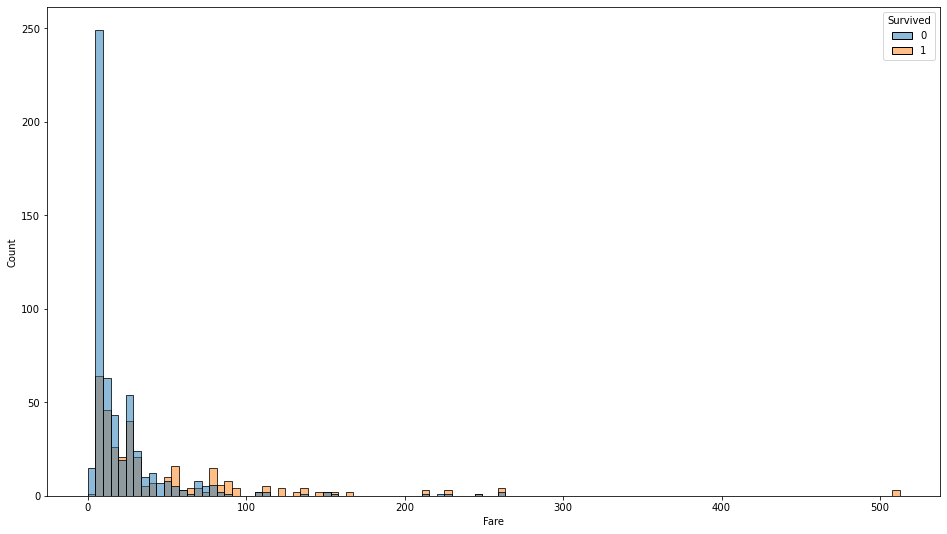

In [136]:
plt.figure(figsize=(16,9))
sns.histplot(data=train,x='Fare',hue='Survived')

In [137]:
train.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [138]:
train[train.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [139]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [25]:
test.Fare.fillna(train.loc[(train.Pclass==3)&(train.Embarked=='S'),'Fare'].mean(),inplace=True)

### Embarked

In [8]:
train[train.Embarked.isnull()]

SyntaxError: invalid syntax (Temp/ipykernel_19772/4032217898.py, line 1)

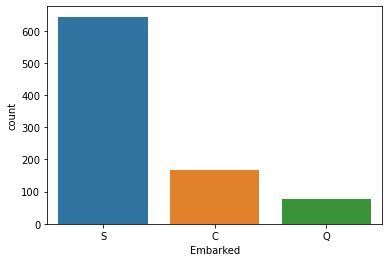

In [26]:
sns.countplot(x=train.Embarked);

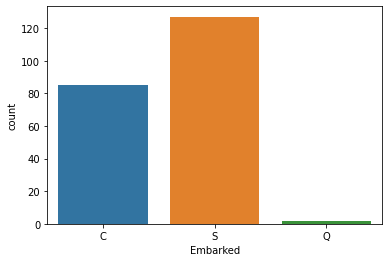

In [27]:
sns.countplot(x=train.loc[train.Pclass==1,'Embarked']);

In [28]:
train.Embarked.fillna('S',inplace=True)

### Survived

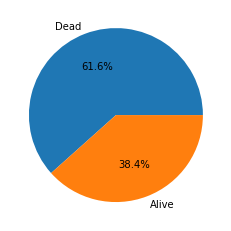

In [29]:
y = train.Survived.value_counts().values

plt.pie(y,labels=['Dead','Alive'],autopct='%0.1f%%');

In [30]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,7.73913,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C


In [31]:
train_data = train[train.columns.difference(['PassengerId','Name','Ticket','Cabin'])]
test_data = test[test.columns.difference(['Name','Ticket','Cabin'])]

### data preprocessing

In [221]:
train_data

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.000000,S,7.2500,0,3,male,1,0
1,38.000000,C,71.2833,0,1,female,1,1
2,26.000000,S,7.9250,0,3,female,0,1
3,35.000000,S,53.1000,0,1,female,1,1
4,35.000000,S,8.0500,0,3,male,0,0
...,...,...,...,...,...,...,...,...
886,27.000000,S,13.0000,0,2,male,0,0
887,19.000000,S,30.0000,0,1,female,0,1
888,20.465882,S,23.4500,2,3,female,1,0
889,26.000000,C,30.0000,0,1,male,0,1


In [32]:
combine = [train_data,test_data]

In [33]:
train_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [34]:
pd.cut(train_data.Age,5)

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
             ...       
886    (16.336, 32.252]
887    (16.336, 32.252]
888      (0.34, 16.336]
889    (16.336, 32.252]
890    (16.336, 32.252]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [35]:
train_data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [36]:
train_data.isnull().sum()

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
dtype: int64

In [261]:
pd.options.mode.chained_assignment = 'warn'`

In [37]:
for dataset in combine:
    #mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].copy().map({'S': 0, 'C': 1, 'Q': 2})
    
    #mapping Sex
    dataset['Sex'] = dataset['Sex'].copy().map({'male':1,'female':2})
    
    #mapping Fare
    dataset.loc[dataset['Fare']<=7.91,'Fare'] = 0
    dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.45),'Fare'] = 1
    dataset.loc[(dataset['Fare']>14.45)&(dataset['Fare']<=31),'Fare'] = 2
    dataset.loc[dataset['Fare']>31,'Fare'] = 3
    
    #mapping Age
    dataset.loc[dataset['Age']<=16,'Fare'] = 0
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=32),'Age'] = 1
    dataset.loc[(dataset['Age']>32)&(dataset['Age']<=48),'Age'] = 2
    dataset.loc[(dataset['Age']>48)&(dataset['Age']<=64),'Age'] = 3
    dataset.loc[dataset['Age']>64,'Age'] = 4

C:\Users\Hankm\AppData\Local\Temp/ipykernel_19772/941864752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Embarked'] = dataset['Embarked'].copy().map({'S': 0, 'C': 1, 'Q': 2})
C:\Users\Hankm\AppData\Local\Temp/ipykernel_19772/941864752.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sex'] = dataset['Sex'].copy().map({'male':1,'female':2})
C:\Users\Hankm\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [38]:
train_data.isnull().sum()

Age         0
Embarked    0
Fare        0
Parch       0
Pclass      0
Sex         0
SibSp       0
Survived    0
dtype: int64

### split to x,y

In [272]:
train_data

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,1.0,0,0.0,0,3,1,1,0
1,2.0,1,3.0,0,1,2,1,1
2,1.0,0,1.0,0,3,2,0,1
3,2.0,0,3.0,0,1,2,1,1
4,2.0,0,1.0,0,3,1,0,0
...,...,...,...,...,...,...,...,...
886,1.0,0,1.0,0,2,1,0,0
887,1.0,0,2.0,0,1,2,0,1
888,1.0,0,2.0,2,3,2,1,0
889,1.0,1,2.0,0,1,1,0,1


In [39]:
X = train_data[train_data.columns.difference(['Survived'])]
y = train_data['Survived']

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

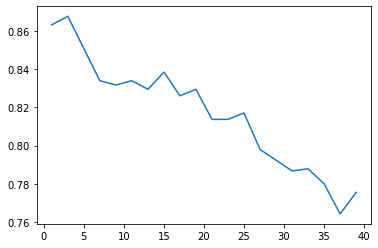

In [41]:
accuracy = []
for k in range(1,40,2):
    clf = KNeighborsClassifier(k)
    clf.fit(X,y)
    accuracy.append(clf.score(X,y))
plt.plot(range(1,40,2),accuracy)

In [42]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Predict"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X.iloc[train_index], X.iloc[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		if name in acc_dict:
			acc_dict[name] += train_predictions
		else:
			acc_dict[name] = train_predictions

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)
log

,Classifier,Predict
0,KNeighborsClassifier,"[0.5, 0.6, 0.1, 0.7, 0.2, 0.4, 0.5, 0.3, 0.4, ..."
0,SVC,"[0.3, 0.7, 0.2, 0.6, 0.2, 0.5, 0.4, 0.3, 0.3, ..."
0,DecisionTreeClassifier,"[0.5, 0.6, 0.1, 0.5, 0.1, 0.4, 0.4, 0.3, 0.4, ..."
0,RandomForestClassifier,"[0.5, 0.7, 0.1, 0.7, 0.1, 0.4, 0.4, 0.3, 0.4, ..."
0,AdaBoostClassifier,"[0.3, 0.7, 0.2, 0.6, 0.2, 0.5, 0.5, 0.3, 0.3, ..."
0,GradientBoostingClassifier,"[0.2, 0.6, 0.1, 0.5, 0.2, 0.4, 0.4, 0.3, 0.3, ..."
0,GaussianNB,"[0.5, 0.9, 0.3, 0.7, 0.3, 0.5, 0.6, 0.4, 0.6, ..."
0,LinearDiscriminantAnalysis,"[0.3, 0.7, 0.2, 0.6, 0.2, 0.5, 0.4, 0.3, 0.4, ..."
0,QuadraticDiscriminantAnalysis,"[0.4, 0.8, 0.1, 0.6, 0.2, 0.6, 0.4, 0.3, 0.5, ..."
0,LogisticRegression,"[0.3, 0.8, 0.1, 0.6, 0.2, 0.5, 0.4, 0.3, 0.4, ..."


In [43]:
log = log.set_index('Classifier')

In [44]:
log.reset_index(inplace=True)

In [46]:
log.Predict[0]

array([0.5, 0.6, 0.1, 0.7, 0.2, 0.4, 0.5, 0.3, 0.4, 0.1, 0.5, 0.2, 0.6,
       0.3, 0.3, 0.3, 0.5, 0.1, 0.2, 0.7, 0.2, 0.5, 0.3, 0.4, 0.3, 0.3,
       0.3, 0.7, 0.6, 0.4, 0.6, 0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.5, 0.2,
       0.2, 0.6, 0.4, 0. , 0.3, 0.4, 0.2, 0.3, 0.5, 0.3, 0.2, 0.3, 0.6,
       0.4, 0.5, 0.4, 0.2, 0.5, 0.6, 0.2, 0.3, 0.2, 0.7, 0.6, 0.6, 0.2,
       0.5, 0.4, 0.2, 0.4, 0.3, 0.7, 0.5, 0.3, 0.2, 0.4, 0.5, 0.2, 0.3,
       0.5, 0.4, 0.3, 0.2, 0.5, 0. , 0.6, 0.3, 0.2, 0.4, 0.6, 0.2])

In [315]:
predict = []
for i in log.Predict:
    tmp = []
    for j in i:
        if j >= 0.4:
            tmp.append(1)
        else:
            tmp.append(0)
    predict.append(tmp)

In [316]:
log['Final'] = predict
log

,Classifier,Predict,Final
0,KNeighborsClassifier,"[0.5, 0.7, 0.1, 0.7, 0.3, 0.5, 0.5, 0.3, 0.3, ...","[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, ..."
1,SVC,"[0.4, 0.7, 0.1, 0.6, 0.2, 0.5, 0.4, 0.3, 0.3, ...","[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."
2,DecisionTreeClassifier,"[0.4, 0.6, 0.1, 0.4, 0.2, 0.4, 0.4, 0.4, 0.2, ...","[1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, ..."
3,RandomForestClassifier,"[0.4, 0.7, 0.2, 0.7, 0.2, 0.4, 0.5, 0.3, 0.3, ...","[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."
4,AdaBoostClassifier,"[0.4, 0.7, 0.2, 0.6, 0.2, 0.5, 0.5, 0.3, 0.3, ...","[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."
5,GradientBoostingClassifier,"[0.3, 0.6, 0.1, 0.5, 0.2, 0.4, 0.4, 0.2, 0.3, ...","[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."
6,GaussianNB,"[0.5, 0.9, 0.3, 0.7, 0.4, 0.5, 0.5, 0.5, 0.6, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, ..."
7,LinearDiscriminantAnalysis,"[0.3, 0.7, 0.2, 0.6, 0.2, 0.5, 0.4, 0.3, 0.4, ...","[0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, ..."
8,QuadraticDiscriminantAnalysis,"[0.4, 0.7, 0.1, 0.7, 0.1, 0.6, 0.4, 0.2, 0.5, ...","[1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, ..."
9,LogisticRegression,"[0.3, 0.7, 0.1, 0.6, 0.2, 0.5, 0.4, 0.3, 0.5, ...","[0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, ..."


In [321]:
len(y)

891

In [319]:
final_acc = {}
for idx,num in enumerate(log.Classifier):
    accuracy_score(log.Final[idx],y)

0:KNeighborsClassifier
1:SVC
2:DecisionTreeClassifier
3:RandomForestClassifier
4:AdaBoostClassifier
5:GradientBoostingClassifier
6:GaussianNB
7:LinearDiscriminantAnalysis
8:QuadraticDiscriminantAnalysis
9:LogisticRegression


In [279]:
accuracy_score(log.Final)

[1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0]

In [213]:
X[X.isnull()]

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
